# Calculation

In [15]:
# https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-core/data_sheet/80/db/fer/elp_43_10_28.pdf?ref_disty=mouser
# Combination: ELP 43/10/28 with ELP 43/10/28 N87
# Ae = 225 mm2
Ae = 225e-6
# le = 61.6 mm
le = 61.6e-3
AL = 7300e-9 #nH +/-25%
N = 8
L = AL *N**2
print(L*1e6,'uH')
#v = L di/dt 
#dt = L di/v
v=97
di=1

dt= L*di/v
print(dt*1e6,"us")
print("B mT", 1e3*v*dt/(Ae*N))

467.20000000000005 uH
4.816494845360825 us
B mT 259.5555555555556


In [25]:
import numpy as np

# Core parameters (m, H/m)
AL_nom = AL
mu0 = 4 * np.pi * 1e-7
gapp = 0.4e-3  
lg=2*gapp # Total gap 2 * x

# Calculate new AL using the reluctance sum formula:
# 1/AL_gapped = 1/AL_nom + lg / (mu0 * Ae)
AL_gapped = 1 / ((1 / AL_nom) + (lg / (mu0 * Ae)))
L_air_gap = N**2*AL_gapped
print(f"AL (nH) with 0.10 mm gap: {AL_gapped * 1e9:.0f}")
print(f"L (uH) with 0.10 mm gap: {L_air_gap * 1e6:.0f}")



v=97
di=11

dt= L_air_gap*di/v
print(dt*1e6,"us")
print("B mT", 1e3*v*dt/(Ae*N))

AL (nH) with 0.10 mm gap: 337
L (uH) with 0.10 mm gap: 22
2.4466402305368855 us
B mT 131.84672353448772


# Test 1

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv("2025-11-30_14-58-37-525.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
Ts = df.Ts.values[0]
df.head()

,CH1,CH2,time,Ts
0,-0.024000,-0.055813,0.000000e+00,1.000000e-09
1,-0.024125,-0.056719,1.000000e-09,NaN
2,-0.015844,-0.044000,2.000000e-09,NaN
3,-0.012000,-0.056250,3.000000e-09,NaN
4,-0.016063,-0.052000,4.000000e-09,NaN


In [29]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]


In [30]:
v0=vds[:200].mean()
i0= iD[:200].mean()
print(v0, i0)
vds2= vds-v0
id2=iD-i0

-1.83534375 -0.0469659375


In [31]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
len(idx_rise), len(idx_fall)

(1, 1)

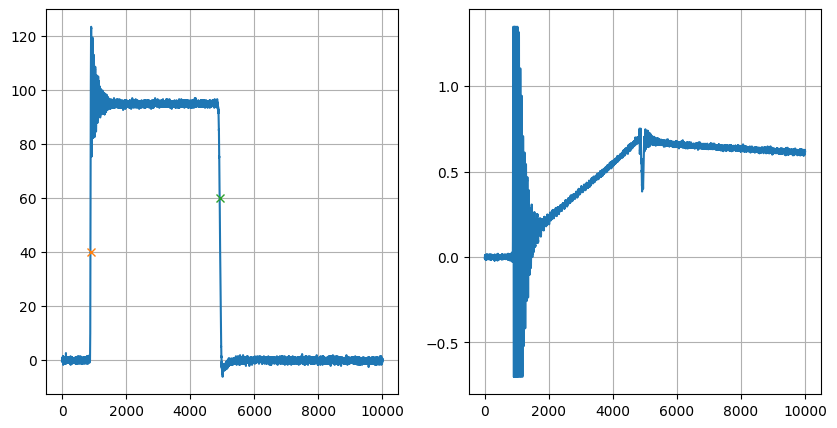

In [32]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
axs[0].plot(vds2)
if len(idx_rise): 
    axs[0].plot(idx_rise, len(idx_rise)*[40], marker= "x")
if len(idx_fall): 
    axs[0].plot(idx_fall, len(idx_fall)*[60], marker= "x")
axs[1].plot(id2)
axs[0].grid()
axs[1].grid()

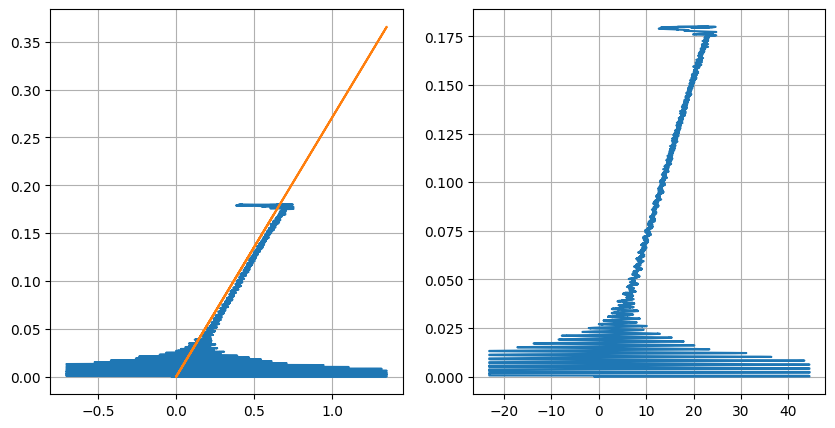

In [44]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
# Ae = 534.2 mm2
Ae = 534.2e-6
# le = 121.2 mm
le = 121.2e-3
integV= np.cumsum(vds2)*Ts
N= 4
flux = integV/N
B = flux /Ae
H= N*id2/le
fig, axs = plt.subplots(1,2, figsize= (10,5))
plt.plot

L = 580e-6
Bcal = L*id2/(Ae*N)
AL = L/N**2 # L= AL *N**2 

#ALnom = 9600
#error =100*(AL*1e9-ALnom) /ALnom
#print ("AL (nH)= ", AL*1e9, "error %", error)

axs[0].plot(id2,B)
msk = (Bcal < 0.4)  & (id2 >0)
axs[0].plot(id2[msk],Bcal[msk])
axs[1].plot(H, B)
axs[0].grid()
axs[1].grid()

In [47]:
AL*N**2

0.00058

In [48]:
import numpy as np

# Core parameters (m, H/m)
AL_nom = AL
Ae = 534.2e-6
mu0 = 4 * np.pi * 1e-7
lg = 0.40e-3  # Total gap 2 * 0.05 mm

# Calculate new AL using the reluctance sum formula:
# 1/AL_gapped = 1/AL_nom + lg / (mu0 * Ae)
AL_gapped = 1 / ((1 / AL_nom) + (lg / (mu0 * Ae)))
L_air_gap = N**2*AL_gapped
print(f"AL (nH) with 0.8 mm gap: {AL_gapped * 1e9:.0f}")
print(f"L (uH) with 0.8 mm gap: {L_air_gap * 1e6:.0f}")

AL (nH) with 0.8 mm gap: 1604
L (uH) with 0.8 mm gap: 26


In [49]:
#v = L di/dt 
#dt = L di/v
v=85
di=10
L = 23e-6
dt= L*di/v
print(dt*1e6,"us")

2.7058823529411766 us
